In [1]:
import os
import pickle
import pandas as pd
import signalprocessing as sigp
import seaborn as sn
import soundmfccparams as smfccp

In [2]:
name = "20200215"
# Path for packs
#signalPath = r"/home/vaclav/Desktop/Diploma/Dirty Signals/Test/Test08/"
signalPath = r"C:/Users/Vaclav/Documents/Diploma/Dirty Signals/snd.L-01.P3/"+name
# Path for RandomForestClassifier
classifierPath = "C:/Users/Vaclav/Documents/Diploma/Notebooks/Classifier/classificator.sav"

In [3]:
# Extracting the dataframes (data characteristics)
#signalDataFrame = sigp.extract_data(signalPath)

In [4]:
#signalDataFrame = smfccp.pca_dataframe(signalDataFrame, 15)
#rng = range(0, int((len(list(signalDataFrame))-1)/2)+1)
#new_cols = ['type_' + str(i) for i in rng] + ['expt_' + str(i) for i in rng]
#signalDataFrame.columns = new_cols[:len(list(signalDataFrame))]
#signalDataFrame.to_csv("20200303.csv", sep='\t', encoding='utf-8', index=False)

In [5]:
signalDataFrame = pd.read_csv('C:/Users/Vaclav/Documents/Diploma/Notebooks/Classifier/DataBaseCsv/'+name+'.csv', sep='\t') 

files = []
# r=root, d=directories, f = files
for r, d, f in os.walk('C:/Users/Vaclav/Documents/Diploma/Dirty Signals/snd.L-01.P3/'+name):
    for file in f:
        if '.wav' in file:
            files.append(file)
            
dfilenames = pd.DataFrame(files, columns=['Filename']) 
signalDataFrame = pd.concat([dfilenames, signalDataFrame],axis=1)

signalDataFrame

,Filename,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,...,MFCC_10,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19
0,snd-P3.20200215.0000.0.wav,65892.927403,9464.939621,44739.636574,30884.595130,9071.450467,1790.870927,2486.256121,2.106126e+06,0.003706,...,-2.345497,-2.527080,3.964786,8.586159,4.441216,2.904282,6.416949,0.973813,2.207644,-0.713470
1,snd-P3.20200215.0015.0.wav,40610.794275,1510.657591,34970.036166,11101.079991,2676.475784,1556.668955,3099.670574,1.182376e+06,0.003802,...,1.999371,-7.351343,4.217564,10.900920,-0.585237,3.527596,9.916430,-1.722005,-0.170730,6.943369
2,snd-P3.20200215.0019.0.wav,76539.366620,30198.364184,45837.041758,34387.124658,39410.579061,1628.067026,1895.153925,4.218525e+06,0.004548,...,-11.009940,6.611860,1.045463,4.502542,6.019436,2.925061,7.262787,-0.330718,7.523815,-4.159833
3,snd-P3.20200215.0019.1.wav,47542.877826,3864.211923,23569.573176,40427.252849,8043.751159,874.210856,1953.042587,3.665913e+06,0.005891,...,-5.274606,2.403678,3.747241,1.967332,7.697121,1.473037,7.399153,1.008354,5.492184,-2.032466
4,snd-P3.20200215.0019.2.wav,54756.784042,20283.530368,35183.830137,17505.382930,6421.859836,1407.112559,2510.895234,2.283172e+06,0.004157,...,-1.788767,-3.850537,4.073533,7.583539,3.439827,2.434056,9.463246,0.243803,2.838904,3.237727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,snd-P3.20200215.2335.0.wav,50549.214795,7737.184424,46020.099287,16271.213202,8393.210731,1177.518548,1458.112329,2.744458e+06,0.004755,...,-6.147556,3.347739,2.308677,4.155701,6.800477,3.302596,7.814663,0.382781,5.635310,-2.211868
1170,snd-P3.20200215.2335.1.wav,46159.843441,1499.378170,41131.031230,7327.347453,1097.587347,1645.662014,2952.343820,1.702325e+06,0.003638,...,0.873239,-5.265163,3.587919,10.346933,0.376163,2.850299,8.664538,0.976791,0.894180,5.745392
1171,snd-P3.20200215.2336.0.wav,84431.086836,36088.681781,44963.950012,47925.732592,33084.168290,1361.971472,2710.536830,6.045635e+06,0.004985,...,-16.825554,6.766018,-3.588490,6.847675,5.471976,-0.800703,7.232182,6.234101,9.013550,-6.755124
1172,snd-P3.20200215.2341.0.wav,46556.667117,12064.754733,10516.080008,10822.008264,35432.748514,879.382123,1885.497098,2.681280e+06,0.005204,...,-3.524364,0.436279,2.615881,5.955681,4.787551,1.194913,9.439133,-0.590584,4.245362,-0.984519


In [6]:
# Load the model from disk
loaded_model = pickle.load(open(classifierPath, 'rb'))

In [7]:
# Predicting the classification
predictedData = loaded_model.predict(signalDataFrame.drop('Filename',axis=1))
predictedsignalDataFrame = signalDataFrame.assign(Flag=predictedData)

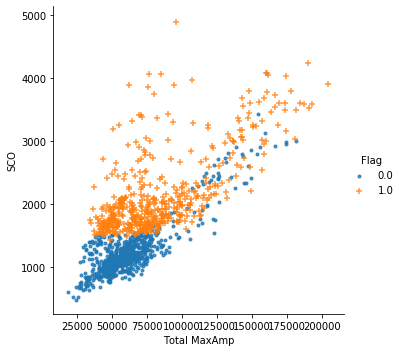

In [8]:
sn.lmplot('Total MaxAmp', 'SCO', data=predictedsignalDataFrame, hue="Flag", fit_reg=False, markers=['.','+'])

In [9]:
# Loading wav files for spectrogramms
audiolist = sigp.load_list_of_wav(signalPath)
temp = audiolist
ppredictedsignalDataFrame = predictedsignalDataFrame.loc[predictedsignalDataFrame['Flag'] == 1]

In [10]:
ppredictedsignalDataFrame.head()

,Filename,Total MaxAmp,Split MaxAmp 1,Split MaxAmp 2,Split MaxAmp 3,Split MaxAmp 4,SCO,Centroid,Spread,Flatness,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,Flag
0,snd-P3.20200215.0000.0.wav,65892.927403,9464.939621,44739.636574,30884.595130,9071.450467,1790.870927,2486.256121,2.106126e+06,0.003706,...,-2.527080,3.964786,8.586159,4.441216,2.904282,6.416949,0.973813,2.207644,-0.713470,1.0
1,snd-P3.20200215.0015.0.wav,40610.794275,1510.657591,34970.036166,11101.079991,2676.475784,1556.668955,3099.670574,1.182376e+06,0.003802,...,-7.351343,4.217564,10.900920,-0.585237,3.527596,9.916430,-1.722005,-0.170730,6.943369,1.0
2,snd-P3.20200215.0019.0.wav,76539.366620,30198.364184,45837.041758,34387.124658,39410.579061,1628.067026,1895.153925,4.218525e+06,0.004548,...,6.611860,1.045463,4.502542,6.019436,2.925061,7.262787,-0.330718,7.523815,-4.159833,1.0
5,snd-P3.20200215.0029.0.wav,168759.278381,75119.365987,70368.591971,92434.764344,84233.694680,3255.095328,1919.113553,3.386193e+06,0.002969,...,7.646455,-0.690098,8.245018,4.942222,3.843885,10.912448,-3.194488,7.533312,-4.964107,1.0
8,snd-P3.20200215.0046.0.wav,79732.584288,20592.131838,59391.084028,40780.107182,19119.253936,2720.888550,1590.808219,2.128614e+06,0.003212,...,5.152395,2.666140,13.770047,9.089026,5.594566,3.967043,-2.937504,5.520330,-1.764604,1.0


No handles with labels found to put in legend.


Signal amount is  503
Signal № 0
Time resolution (s) 0.05688888888888889
Frequency resolution (Hz) 17.578125


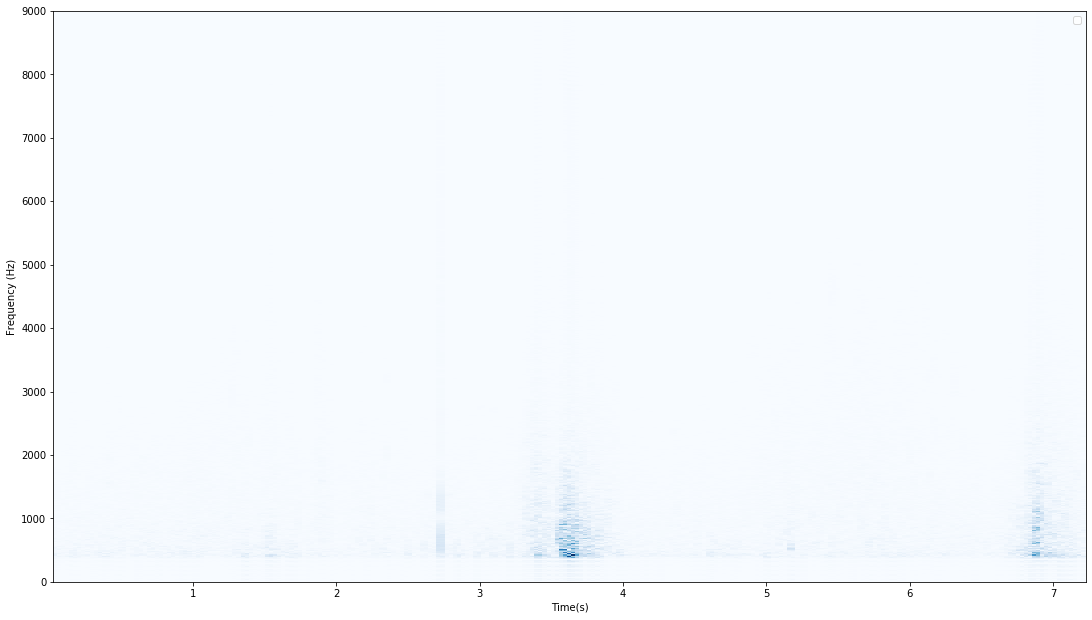

No handles with labels found to put in legend.


Signal № 1
Time resolution (s) 0.05688888888888889
Frequency resolution (Hz) 17.578125


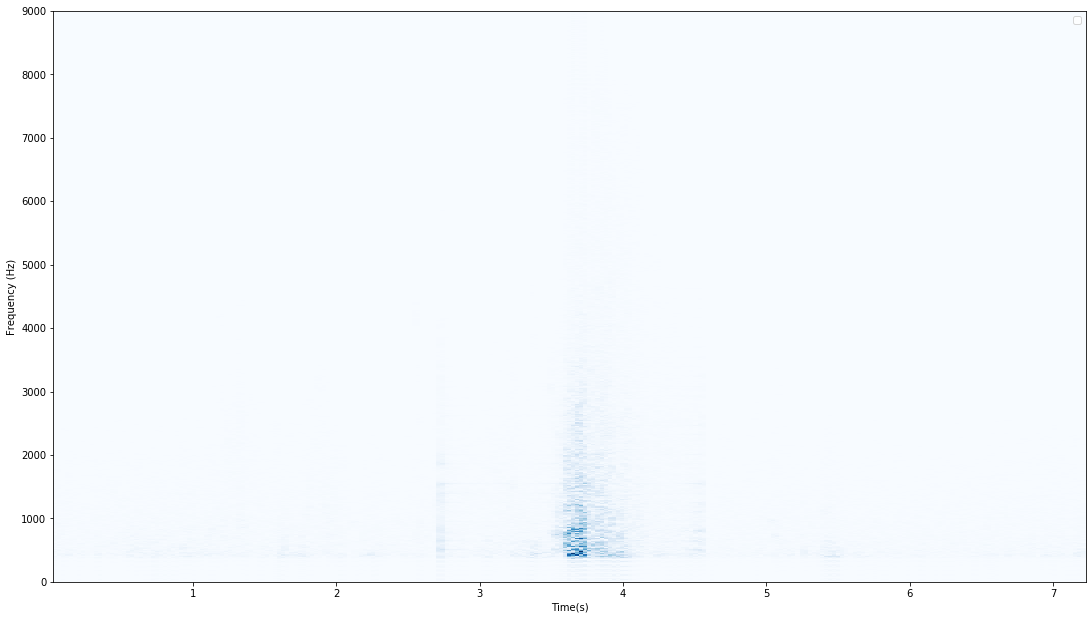

<Figure size 576x432 with 0 Axes>

In [11]:
sigp.plot_all_spectrogramms(audiolist, predictedsignalDataFrame, 1024, 0, 2, 1) # last param is activator , 1 - start, 0 - none

In [12]:
audiolist[1].make_audio()

In [13]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('Signals_'+name+'.xlsx')
ppredictedsignalDataFrame.filter(["Filename"]).to_excel(writer,'Sheet1')
writer.save()

#signalDataFrame.to_csv("Signals_"+name+".csv", sep='\t', encoding='utf-8', index=False)

In [173]:
## This method is for wav saving

#sigp.copy_filtered_signal(signalPath, 850)

In [14]:
# Freeing the memory
#del audiolist[:]
#audiolist = None
#del audiolist